In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#  Import Libraries and Load Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import unittest

# Explore Data

In [3]:
data=pd.read_csv("TCGA_Reports.csv")

In [4]:
data.head()

,patient_filename,text
0,TCGA-BP-5195.25c0b433-5557-4165-922e-2c1eac9c26f0,Date of Recelpt: Clinical Diagnosis & History:...
1,TCGA-D7-8573.b7306a47-697d-4ed3-bbe1-81d49674a8f8,"Material: 1) Material: stomach, Method of coll..."
2,TCGA-EI-7004.13591eed-30e5-47a3-91be-7a370663d2d4,page 1 / 1. copy No. 3. Examination: Histopath...
3,TCGA-EB-A82B.23E186C6-739C-4EF1-8788-79AA89C6E87A,Patient ID: Gross Description: A mass is locat...
4,TCGA-A6-3808.e1505f65-72ef-438d-a5e1-93ed8bf6635d,SPECIMEN. Right colon. CLINICAL NOTES. PRE-OP ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9523 entries, 0 to 9522
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patient_filename  9523 non-null   object
 1   text              9523 non-null   object
dtypes: object(2)
memory usage: 148.9+ KB


In [6]:
data.tail()

,patient_filename,text
9518,TCGA-GM-A3XL.E8583D11-D6F7-41AC-8CD5-53437CBD8820,DIAGNOSIS. (A) RIGHT AXILLARY SENTINEL LYMPH N...
9519,TCGA-B5-A1MY.A5328E25-1433-4331-83B8-148780F6A6DA,"Adenocarcenona, serous, NOS 8441/3 Sriteria. C..."
9520,TCGA-DJ-A2Q7.2C3553C3-902B-4783-A474-332877823538,Clinical Diagnosis & History: Bilateral thyroi...
9521,TCGA-CK-4948.31ba7387-df2f-4d70-b413-3734ba02438e,"Type: Surgical Pathology. COLON, SEGMENTAL RES..."
9522,TCGA-AA-3538.32912174-66b8-4144-9ef0-26b04c05e568,Diagnosis/Diagnoses: 1.: Excision specimen fro...


In [7]:
data.isnull().sum()

patient_filename    0
text                0
dtype: int64

# Data Preprocessing - Label Encoding

In [8]:
le=LabelEncoder()
data['patient_filename']=le.fit_transform(data['patient_filename'])

In [9]:
data.tail()

,patient_filename,text
9518,6992,DIAGNOSIS. (A) RIGHT AXILLARY SENTINEL LYMPH N...
9519,3261,"Adenocarcenona, serous, NOS 8441/3 Sriteria. C..."
9520,5310,Clinical Diagnosis & History: Bilateral thyroi...
9521,4324,"Type: Surgical Pathology. COLON, SEGMENTAL RES..."
9522,2391,Diagnosis/Diagnoses: 1.: Excision specimen fro...


In [10]:
data['patient_filename'].value_counts()/data['patient_filename'].count()*100

patient_filename
3883    0.010501
5079    0.010501
8033    0.010501
8966    0.010501
3876    0.010501
          ...   
5629    0.010501
4176    0.010501
6664    0.010501
530     0.010501
2391    0.010501
Name: count, Length: 9523, dtype: float64

<Axes: xlabel='patient_filename'>

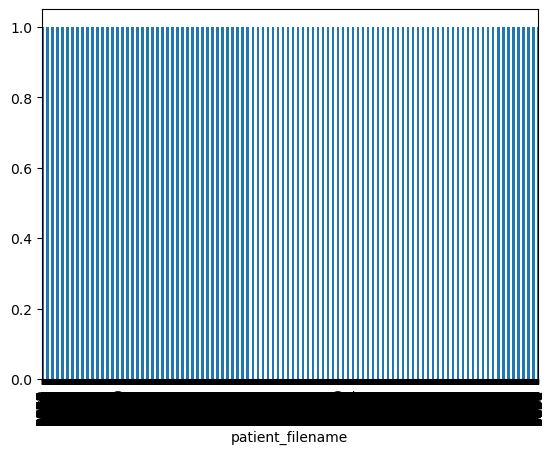

In [11]:
data['patient_filename'].value_counts().plot(kind='bar')

In [12]:
cv=CountVectorizer(max_features=3000)
tfidf=TfidfVectorizer(max_features=4600)
x=tfidf.fit_transform(data['text']).toarray()

In [13]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
y=data['patient_filename'].values

#  Handling Imbalanced Classes

In [15]:
# Identify classes with only one instance
single_instance_classes = data['patient_filename'].value_counts()[data['patient_filename'].value_counts() == 1].index

# Combine instances of these classes into a new class (e.g., 'Other')
data['patient_filename'] = np.where(data['patient_filename'].isin(single_instance_classes), 'Other', data['patient_filename'])

In [16]:
print(data['patient_filename'].unique())

['Other']


In [17]:
print(data['patient_filename'].value_counts())

patient_filename
Other    9523
Name: count, dtype: int64


# Train-Test Split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=56, shuffle=True)

# Naive Bayes Models Training and Evaluation

In [19]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [20]:
l=[gb,mb,bb]
for model in l:
    train(model)

GaussianNB()
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       0.0
          31       0.00      0.00      0.00       1.0
  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

MultinomialNB()
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

BernoulliNB()
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       0.0
          31       0.00      0.00      0.00       1.0
 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

#  Data Cleaning - Remove Duplicates

In [21]:
data.duplicated().sum()

18

In [22]:
data=data.drop_duplicates()
data.size

19010

In [23]:
data.head()

,patient_filename,text
0,Other,Date of Recelpt: Clinical Diagnosis & History:...
1,Other,"Material: 1) Material: stomach, Method of coll..."
2,Other,page 1 / 1. copy No. 3. Examination: Histopath...
3,Other,Patient ID: Gross Description: A mass is locat...
4,Other,SPECIMEN. Right colon. CLINICAL NOTES. PRE-OP ...


In [35]:
data['patient_filename'].value_counts()/data['patient_filename'].count()*100

patient_filename
Other    100.0
Name: count, dtype: float64

# Text Vectorization (TF-IDF)

In [25]:
#cv=CountVectorizer(max_features=2000,ngram_range=(3,3)) 
tfidf=TfidfVectorizer(max_features=967)
x=tfidf.fit_transform(data['text']).toarray()
y=data['patient_filename'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56,stratify=y)
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [26]:
l=[gb,bb]
for model in l:
    train(model)

GaussianNB()
[[2377]]
              precision    recall  f1-score   support

       Other       1.00      1.00      1.00      2377

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

1.0
BernoulliNB()
[[2377]]
              precision    recall  f1-score   support

       Other       1.00      1.00      1.00      2377

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

1.0


# Data Visualization - Word Cloud and Count Plot

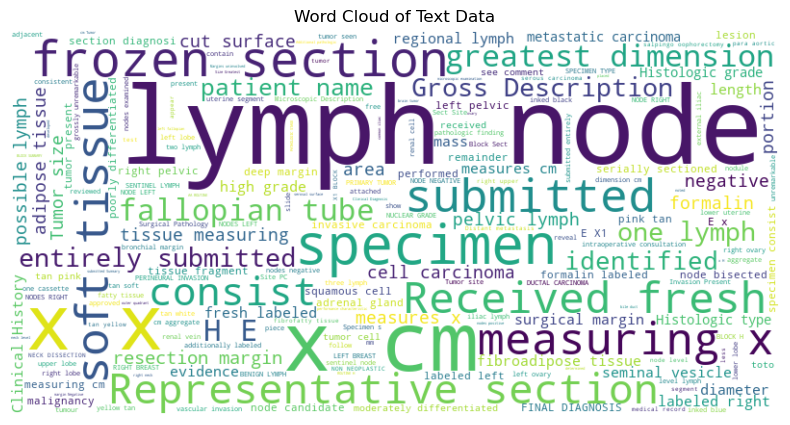

In [27]:
class_counts = data['patient_filename'].value_counts()
filtered_data = data[data['patient_filename'].isin(class_counts.index[class_counts >= 2])]

# Word Cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(filtered_data['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

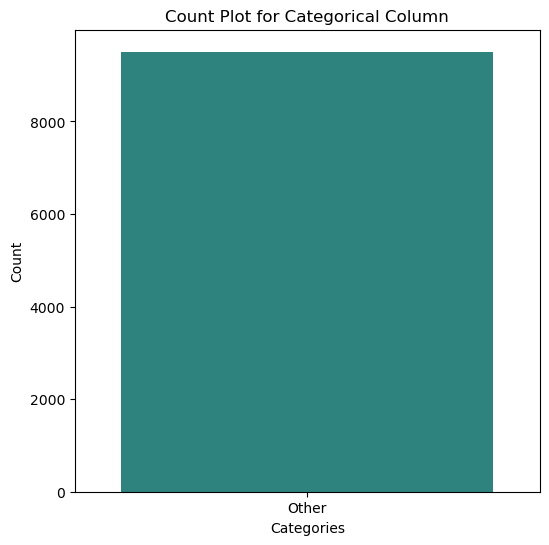

In [28]:
# Example count plot for the 'patient_filename' column
plt.figure(figsize=(6, 6))
sns.countplot(x='patient_filename', data=filtered_data, palette='viridis')
plt.title('Count Plot for Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [29]:
pip install langid


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Indexing with Lang Chain

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import langid

# Function to filter out non-English text
def filter_english_text(text):
    lang, _ = langid.classify(text)
    return lang == 'en'

# Apply language filtering
filtered_data['text'] = filtered_data['text'].apply(lambda x: '' if not filter_english_text(x) else x)

# Tfidf Vectorization
tfidf = TfidfVectorizer(max_features=967)
x_lang = tfidf.fit_transform(filtered_data['text']).toarray()


# Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, x_test, y_test):
    y_predict = model.predict(x_test)
    print(confusion_matrix(y_test, y_predict))
    print(classification_report(y_test, y_predict))
    accuracy = accuracy_score(y_test, y_predict)
    print(f"Accuracy: {accuracy}")

# Assuming you have a trained model, let's say 'gb'
evaluate_model(gb, x_test, y_test)


[[2377]]
              precision    recall  f1-score   support

       Other       1.00      1.00      1.00      2377

    accuracy                           1.00      2377
   macro avg       1.00      1.00      1.00      2377
weighted avg       1.00      1.00      1.00      2377

Accuracy: 1.0


# Test Cases

In [34]:


class TestModel(unittest.TestCase):
    def test_model_accuracy(self):
        # Assuming you have a trained model 'mb'
        y_predict = mb.predict(x_test)
        accuracy = accuracy_score(y_test, y_predict)
        self.assertGreaterEqual(accuracy, 0.8)  # Adjust threshold as needed

if __name__ == '__main__':
    unittest.main()


E
ERROR: C:\Users\Tech Assignment 02\AppData\Roaming\jupyter\runtime\kernel-08a1bd76-f870-4eac-b18e-25b299bde4b3 (unittest.loader._FailedTest.C:\Users\Tech Assignment 02\AppData\Roaming\jupyter\runtime\kernel-08a1bd76-f870-4eac-b18e-25b299bde4b3)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\Tech Assignment 02\AppData\Roaming\jupyter\runtime\kernel-08a1bd76-f870-4eac-b18e-25b299bde4b3'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: True

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
